In [1]:
import pandas as pd
from ollama import chat
from ollama import ChatResponse
from tqdm import tqdm

In [2]:
df = pd.read_csv('./Datasets/test_set-ANT.csv')
X = df['Neutralized SMILES']
y = df['ATC Codes']

In [3]:
X[1]

'Cn1c(=O)c2c(ncn2CCNCC(O)c2ccc(O)c(O)c2)n(C)c1=O'

In [4]:
df

,Neutralized SMILES,ATC Codes,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpMAD_A,...,nG12FAHRing,SRW03,SRW05,SRW07,SRW09,ATC_level1,ATC_level2,ATC_level3,ATC_level4,multiple_ATC
0,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,A01AB; D10AF; J01AA,26.067060,21.457796,0,1,40.137325,2.651875,5.303750,1.216283,...,0,0.0,0.000000,0.000000,0.000000,"['J', 'A', 'D']","['D10', 'A01', 'J01']","['A01A', 'J01A', 'D10A']","['D10AF', 'J01AA', 'A01AB']",True
1,Cn1c(=O)c2c(ncn2CCNCC(O)c2ccc(O)c(O)c2)n(C)c1=O,C01CA,20.907864,17.027531,0,1,34.502355,2.514216,4.947627,1.277865,...,0,0.0,2.397895,4.727388,6.861711,['C'],['C01'],['C01C'],['C01CA'],False
2,CC(C)=CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,M01AX; M02AA,18.539255,15.705028,0,0,31.004484,2.530576,4.891268,1.291854,...,0,0.0,2.397895,4.948760,7.208600,['M'],"['M02', 'M01']","['M02A', 'M01A']","['M01AX', 'M02AA']",True
3,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,N05AB,23.587910,17.129344,0,2,38.805135,2.501762,5.003525,1.293504,...,1,0.0,0.000000,0.000000,0.000000,['N'],['N05'],['N05A'],['N05AB'],False
4,COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)C...,A03FA,24.317429,18.240404,0,1,41.041522,2.398415,4.796831,1.282548,...,0,0.0,0.000000,0.000000,0.000000,['A'],['A03'],['A03F'],['A03FA'],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN(C)C)c2c1,G01AE; N02CC,15.304979,13.342089,0,1,24.479286,2.433993,4.773135,1.223964,...,0,0.0,2.397895,4.727388,6.823286,"['G', 'N']","['G01', 'N02']","['G01A', 'N02C']","['G01AE', 'N02CC']",True
715,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(N)...,J01DC; J01RA; S01AA,22.212688,18.808559,1,0,36.417076,2.574286,5.148124,1.255761,...,0,0.0,2.397895,4.442651,6.293419,"['J', 'S']","['S01', 'J01']","['J01D', 'S01A', 'J01R']","['J01RA', 'J01DC', 'S01AA']",True
716,CCCCc1oc2ccc(NS(C)(=O)=O)cc2c1C(=O)c1ccc(OCCCN...,C01BD,29.375323,21.933108,0,1,48.942693,2.510979,4.898097,1.254941,...,0,0.0,2.397895,4.844187,7.050123,['C'],['C01'],['C01B'],['C01BD'],False
717,CN/C(=N/C#N)NCCSCc1nc[nH]c1C,A02BA,12.089765,11.136291,0,3,21.154703,2.257483,4.368546,1.244394,...,0,0.0,2.397895,4.595120,6.529419,['A'],['A02'],['A02B'],['A02BA'],False


In [5]:
s_smiles = X[1]
response: ChatResponse = chat(
    model='4gemma-31finetuned', 
    messages=[{"role": "user", "content": s_smiles}],#N06BX 
)
print(response['message']['content'])

J01CA; R05BA; R05BA; R05BA; R05BA; R05BA; R05BA; R05BA; R05BA


In [6]:
if "predicted_atc4" not in df.columns:
    df["predicted_atc4"] = None
import asyncio
from ollama import AsyncClient

async def chat(message):
    response = await AsyncClient().chat(model='4gemma-31finetuned', messages=message)
    return response['message']['content']

for i in range(len(df)):
    smiles = df.at[i, "Neutralized SMILES"]
    message=[
        {"role": "user", "content": s_smiles}
    ]
    try:
      pred = await chat(message)
    except ollama.ResponseError as e:
      print('Error:', e.error)
      if e.status_code == 404:
        ollama.pull(model)
    df.at[i, "predicted_atc4"] = pred

    if i % 10 == 0:
        print("Guardado parcial")

df.to_csv("431finetuned_predicted_atc4.csv", index=False)

Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parci

In [7]:
preds = pd.read_csv('431finetuned_predicted_atc4.csv')
preds = preds['predicted_atc4']

In [8]:
preds

0                      M03AG; M04AH; M08AA; R01AD; R01DA
1                                           N01BA; R01AA
2                                                  N01BA
3                                                  G01AC
4                             A03AA; D07AA; D07BA; R01AA
                             ...                        
714    G04AA; G04AA; G04AA; G04AA; G04AA; G04AA; G04A...
715                                                M01AA
716                                         N01BA; G01AA
717                                                M01AA
718                                                N01AA
Name: predicted_atc4, Length: 719, dtype: object

In [9]:
# Convert a string that simulates a list to a real list
def convert_string_list(element):
    # Delete [] of the string
    element = element[0:len(element)]
    # Create a list that contains each code as e.g. 'A'
    ATC_list = list(element.split('; '))
    for index, code in enumerate(ATC_list):
        # Delete '' of the code
        ATC_list[index] = code[0:len(code)]
    return ATC_list

In [10]:
clear_preds = []
for i, pred in enumerate(preds):
    preds_list = convert_string_list(pred)
    preds_list = set(preds_list)
    clear_preds_i = []
    for p in preds_list:
        if len(p) == 5:
            if p[0].isalpha():
                if p[1:3].isnumeric():
                    if p[3].isalpha():
                        if p[4].isalpha():
                            clear_preds_i.append(p)
                        else:
                            clear_preds_i.append("Invalid prediction")
                    else:
                        clear_preds_i.append("Invalid prediction")
                else:
                    clear_preds_i.append("Invalid prediction")    
            else:
                clear_preds_i.append("Invalid prediction")
        else:
            clear_preds_i.append("Invalid prediction")
    clear_preds.append(clear_preds_i)
clear_preds

[['M08AA', 'R01AD', 'M04AH', 'R01DA', 'M03AG'],
 ['N01BA', 'R01AA'],
 ['N01BA'],
 ['G01AC'],
 ['D07AA', 'D07BA', 'A03AA', 'R01AA'],
 ['J01XX'],
 ['J01XX'],
 ['G05AA', 'G05BA'],
 ['N05AG'],
 ['J01CA'],
 ['N02AX'],
 ['P01AA', 'P05AA'],
 ['M03AA'],
 ['M03AX'],
 ['J01AX'],
 ['P03AX'],
 ['P01AA'],
 ['N01BA'],
 ['P01AA'],
 ['J01XX', 'R01HA', 'R01BA', 'R02AH'],
 ['J01BA'],
 ['G01AX'],
 ['N01AX'],
 ['M01BA', 'M01AA'],
 ['P01AA'],
 ['P01AA'],
 ['M03AG'],
 ['J01BA'],
 ['C03AA', 'C03CB'],
 ['N02AA'],
 ['A07AA'],
 ['P01AA', 'P01CA'],
 ['J01CA'],
 ['N01AA'],
 ['P01AX'],
 ['A04AA'],
 ['P01AA'],
 ['M01AA'],
 ['R03AA', 'N01BA', 'R03BA', 'R01AA'],
 ['N01AH', 'R04AA', 'R05BA'],
 ['M01AA'],
 ['P02AA'],
 ['C03AH', 'G04AJ'],
 ['M02AA'],
 ['J01CA'],
 ['J01BA'],
 ['M07BA'],
 ['B01AA'],
 ['M03BA'],
 ['M02AA'],
 ['N01AF', 'R01AA'],
 ['N01BA', 'R01AA'],
 ['S01CE', 'S01BA', 'M03AX', 'S01CB', 'M09AP', 'M06BA', 'M05AA'],
 ['N01BA'],
 ['R01DX', 'R01CA', 'R01FA', 'R01HA', 'R01GD', 'N01BA', 'R01BA'],
 ['J01AA', 'R03B

In [11]:
print(clear_preds.count("Invalid prediction"))
print(len(clear_preds)-clear_preds.count("Invalid prediction"))

0
719


In [12]:
import matplotlib.pyplot as plt
from collections import defaultdict
counter = defaultdict(int)

for pred in clear_preds:
    set_preds = set(pred)
    for p in set_preds:
        if p != "Invalid prediction":
            counter[p] += 1
counter

defaultdict(int,
            {'M08AA': 2,
             'R01AD': 1,
             'M04AH': 1,
             'R01DA': 3,
             'M03AG': 4,
             'N01BA': 49,
             'R01AA': 47,
             'G01AC': 1,
             'D07AA': 1,
             'D07BA': 1,
             'A03AA': 3,
             'J01XX': 8,
             'G05AA': 4,
             'G05BA': 4,
             'N05AG': 1,
             'J01CA': 46,
             'N02AX': 3,
             'P01AA': 72,
             'P05AA': 7,
             'M03AA': 6,
             'M03AX': 13,
             'J01AX': 6,
             'P03AX': 15,
             'R01HA': 6,
             'R01BA': 18,
             'R02AH': 1,
             'J01BA': 32,
             'G01AX': 2,
             'N01AX': 9,
             'M01BA': 5,
             'M01AA': 41,
             'C03AA': 12,
             'C03CB': 3,
             'N02AA': 3,
             'A07AA': 2,
             'P01CA': 13,
             'N01AA': 27,
             'P01AX': 6,
             'A04AA':

In [13]:
len(counter)

346

In [14]:
counter_preds = defaultdict(int)
for pred in clear_preds:
    set_preds = set(pred)
    counter_preds[len(set_preds)] += 1
print(counter_preds)

defaultdict(<class 'int'>, {5: 26, 2: 81, 1: 474, 4: 38, 3: 61, 7: 8, 8: 3, 6: 15, 10: 7, 9: 5, 11: 1})


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


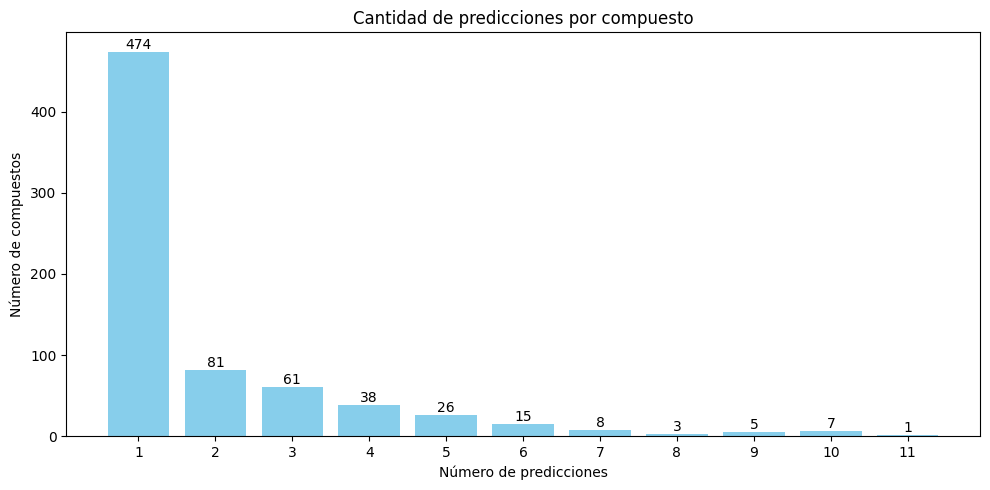

In [15]:
dict_preds = dict(sorted(counter_preds.items()))

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

codes = list(dict_preds.keys())
print(codes)
counts = list(dict_preds.values())

p = ax.bar(codes, counts, color='skyblue')
ax.bar_label(p)
ax.set_xticks(codes)
plt.title('Cantidad de predicciones por compuesto')
plt.xlabel('Número de predicciones')
plt.ylabel('Número de compuestos')
plt.tight_layout()

defaultdict(<class 'int'>, {3: 25, 1: 559, 2: 115, 4: 8, 7: 2, 5: 4, 11: 1, 8: 1, 16: 1, 6: 1, 9: 2})
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 16]


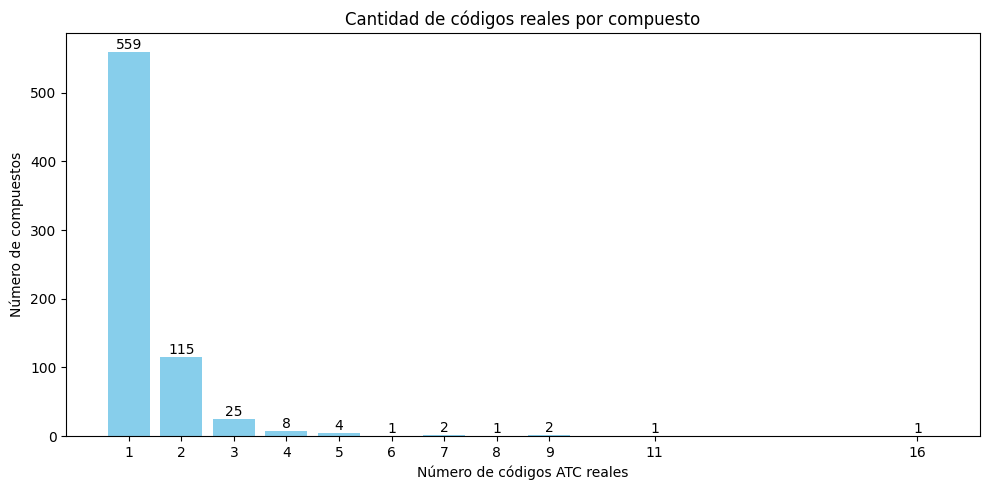

In [17]:
counter_real = defaultdict(int)
for row in df['ATC Codes']:
    ATC_list = convert_string_list(row)
    counter_real[len(ATC_list)] += 1
print(counter_real)
dict_real = dict(sorted(counter_real.items()))

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

codes = list(dict_real.keys())
print(codes)
counts = list(dict_real.values())

p = ax.bar(codes, counts, color='skyblue')
ax.bar_label(p)
ax.set_xticks(codes)
plt.title('Cantidad de códigos reales por compuesto')
plt.xlabel('Número de códigos ATC reales')
plt.ylabel('Número de compuestos')
plt.tight_layout()

In [18]:
for i, pred in enumerate(clear_preds):
    if pred == "Invalid prediction":
        print(pred)

In [19]:
def precision(output_beam2, df_test):
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level
    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_preds = [len(list_preds)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare predicted codes with true codes
        for p in list_preds:
            match_found = [False, False, False, False]
            for true_code in true_codes:
                # Compare each level
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it converts to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                     if level+1 < 4:
                        num_preds[level+1] -= 1
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_preds[level]) if num_preds[level] > 0 else 0) for level in range(4)]
    precisions = [total_matches[level] / valid_comparisons[level] if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    precision_1 = precisions[0] * 100
    precision_2 = precisions[1] * 100
    precision_3 = precisions[2] * 100
    precision_4 = precisions[3] * 100
    return precision_1, precision_2, precision_3, precision_4

In [20]:
def recall(output_beam2, df_test):
    # Load test dataset and initialize counters
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level

    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_true_codes = [len(true_codes)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare true codes with predicted codes
        for true_code in true_codes:
            match_found = [False, False, False, False]
            for p in list_preds:
                # Compare each level
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it is converted to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                    if level+1 < 4:
                        num_true_codes[level+1] -= 1        
        # For compound x it couldn't compare at level i so it has to decrease the amount of comparisons at level i for compound x
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_true_codes[level]) if num_true_codes[level] > 0 else 0) for level in range(4)]

    recalls = [(total_matches[level] / valid_comparisons[level]) if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    recall_1 = recalls[0] * 100
    recall_2 = recalls[1] * 100
    recall_3 = recalls[2] * 100
    recall_4 = recalls[3] * 100
    return recall_1, recall_2, recall_3, recall_4

In [21]:
precision_1, precision_2, precision_3, precision_4 = precision(clear_preds, df)
recall_1, recall_2, recall_3, recall_4 = recall(clear_preds, df)

In [22]:
print(f"Precision level 1: {precision_1}")
print(f"Precision level 2: {precision_2}")
print(f"Precision level 3: {precision_3}")
print(f"Precision level 4: {precision_4}")

Precision level 1: 10.41327240214584
Precision level 2: 15.303506017791731
Precision level 3: 19.11764705882353
Precision level 4: 25.0


In [23]:
print(f"Recall level 1: {recall_1}")
print(f"Recall level 2: {recall_2}")
print(f"Recall level 3: {recall_3}")
print(f"Recall level 4: {recall_4}")

Recall level 1: 11.678836346777931
Recall level 2: 18.315018315018317
Recall level 3: 20.588235294117645
Recall level 4: 25.0


In [24]:
def metrics_calc(output_beam2, df_test):
    precisions = []
    recalls = []
    f1s = []
    from sklearn import metrics
    for i, preds in enumerate(output_beam2):
        ground_truth = convert_string_list(df_test['ATC Codes'].iloc[i])
        binary_predictions = []
        binary_ground_truth = []
        print(ground_truth)
        print(preds)
        set_pred_gt = list(set(preds + ground_truth))
        print(set_pred_gt)
        for code in set_pred_gt:
            if code in preds:
                binary_predictions.append(1)
            else:
                binary_predictions.append(0)
            if code in ground_truth:
                binary_ground_truth.append(1)
            else:
                binary_ground_truth.append(0)    
        print(binary_ground_truth)
        print(binary_predictions)
        precisions.append(metrics.precision_score(binary_ground_truth, binary_predictions, zero_division=0))
        recalls.append(metrics.recall_score(binary_ground_truth, binary_predictions))
        f1s.append(metrics.f1_score(binary_ground_truth, binary_predictions))
    return precisions, recalls, f1s

In [25]:
precisions, recalls, f1s = metrics_calc(clear_preds, df)

['A01AB', 'D10AF', 'J01AA']
['M08AA', 'R01AD', 'M04AH', 'R01DA', 'M03AG']
['D10AF', 'M08AA', 'A01AB', 'R01AD', 'M04AH', 'R01DA', 'M03AG', 'J01AA']
[1, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 0]
['C01CA']
['N01BA', 'R01AA']
['N01BA', 'C01CA', 'R01AA']
[0, 1, 0]
[1, 0, 1]
['M01AX', 'M02AA']
['N01BA']
['M01AX', 'M02AA', 'N01BA']
[1, 1, 0]
[0, 0, 1]
['N05AB']
['G01AC']
['G01AC', 'N05AB']
[0, 1]
[1, 0]
['A03FA']
['D07AA', 'D07BA', 'A03AA', 'R01AA']
['D07AA', 'R01AA', 'A03AA', 'A03FA', 'D07BA']
[0, 0, 0, 1, 0]
[1, 1, 1, 0, 1]
['N06AB']
['J01XX']
['J01XX', 'N06AB']
[0, 1]
[1, 0]
['D06BA', 'G01AE', 'J01ED', 'J01EE']
['J01XX']
['J01EE', 'J01ED', 'J01XX', 'D06BA', 'G01AE']
[1, 1, 0, 1, 1]
[0, 0, 1, 0, 0]
['A02AB']
['G05AA', 'G05BA']
['A02AB', 'G05AA', 'G05BA']
[1, 0, 0]
[0, 1, 1]
['L04AA', 'L04AE']
['N05AG']
['L04AA', 'L04AE', 'N05AG']
[1, 1, 0]
[0, 0, 1]
['D03AX']
['J01CA']
['D03AX', 'J01CA']
[1, 0]
[0, 1]
['C05CA']
['N02AX']
['C05CA', 'N02AX']
[1, 0]
[0, 1]
['D07AB', 'S01BA']
['P01AA', 'P05

In [26]:
f1s

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [27]:
precisions_average = sum(precisions)/len(precisions)
recalls_average = sum(recalls)/len(recalls)
f1s_average = sum(f1s)/len(f1s)

In [28]:
print(precisions_average)
print(recalls_average)
print(f1s_average)

0.0003477051460361613
0.0013908205841446453
0.0005563282336578582
